# Data Handling

This is a quick intro to how the data is presented and how to use it. I'll also demonstrate how to phase a light curve. Use the code here as a starter for your own scripts.

All the data is in `.npy` files in the `./data/` folder.

The `.npy` format is the default way for NumPy to save/load data.

In [21]:
import numpy as np

# Load the data for binary 12:
data = np.load('./data/12.npy')
time, flux, flux_err = data[:, 0], data[:, 1], data[:, 2]

Each file has three columns:
1. The time in __days__
2. The flux in __relative__ units
3. The error on the flux

The real units of the flux don't really matter. The flux has been normalised so that any systematic effects are removed and the flux _outside of an eclipse_ is 1.0. You can probably ignore the error on the flux

In [25]:
print(len(time))
print((time[-1] - time[0]) / (365.0))

65266
4.028663823403512


So system 12 has 65266 data points taken over 4.03 years, let's see what the light curve looks like:

In [17]:
import matplotlib.pyplot as plt

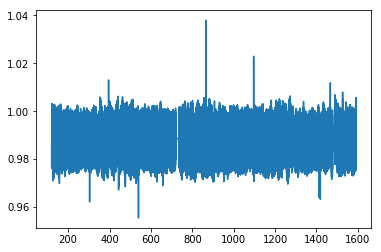

In [32]:
plt.plot(time, flux)
plt.show()

We will have to zoom in to see any detail here. This is exactly two day's worth of data...

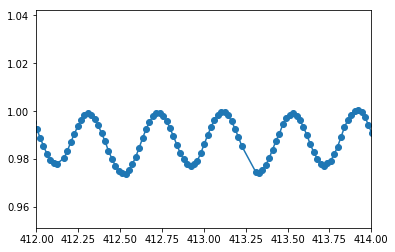

In [33]:
plt.plot(time, flux, '-o')
plt.xlim([412, 414])
plt.show()

You could use a function like the below to phase the light curve, it requires the period of the binary system and the time of the first eclipse which you will have to measure yourself. Without the time of the first eclipse the phasing will be correct but the primary eclipse will not be at 0.0.

__Remember__ the correct period is the one that properly phases the light curve like the below. The correct first eclipse time is the one that puts the primary eclipse at 0.0. You can use these facts to fit for the right parameters if needed.

In [34]:
def phaser(t, f, p, t0=0.0):
    
    phi = ((t - t0) / p) - np.floor((t - t0) / p)
    sort = np.argsort(phi)
    
    return phi[sort], f[sort]

The correct period for this binary is 0.801921 days. We can use this to phase the light curve

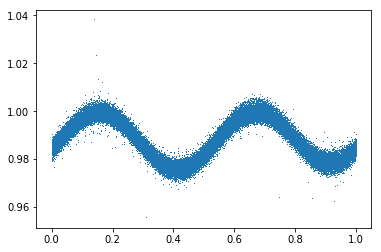

In [39]:
phase, flux_phased = phaser(time, flux, 0.801921)

plt.plot(phase, flux_phased, ',')
plt.show()